# Setup

In [1]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import operator

# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# enhanced stats functions
from scipy import stats

# for ease of data profiling
from pandas_profiling import ProfileReport

# for removal of warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# print environment setup details
print(f"pandas version  : {pd.__version__}")  # 1.4.3
print(f"numpy version   : {np.__version__}")  # 1.23.1
print(f"seaborn version : {sns.__version__}") # 0.11.2

pandas version  : 1.4.3
numpy version   : 1.23.1
seaborn version : 0.11.2


Here, we also set the seed for numpy's random number generator such that our results are fully reproducible. This is because the other libraries (e.g. scikit-learn) use this random number generator, so if we set the seed we will always generate the same random numbers in the same sequence.

Thus, whenever we run the notebook from top-to-bottom, we will end up with the *exact* same results! 

In [3]:
SEED = 123
np.random.seed(SEED)

# Data Loading
To load in the data for this project, read in `iris.csv` into a variable called `iris` as a pandas DataFrame. The first five rows of the DataFrame should look like this:

|       | sepal_length | sepal_width | petal_length | petal_width |   species   |
| ----- | ------------ | ----------- | ------------ | ----------- | ----------- |
| **0** |      5.1     |     3.5     |     1.4      |     0.2     | iris-setosa |
| **1** |      4.9     |     3.0     |     1.4      |     0.2     | iris-setosa |
| **2** |      4.7     |     3.2     |     1.3      |     0.2     | iris-setosa |
| **3** |      4.6     |     3.1     |     1.5      |     0.2     | iris-setosa |
| **4** |      5.0     |     3.6     |     1.4      |     0.2     | iris-setosa |

In [4]:
# read in data
iris = pd.read_csv('iris.csv')

In [5]:
# make sure data was read in properly and matches above table
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA
As the beginning of any machine learning project, let us first take a look at what our dataset is like through EDA. 

**Data dictionary**

|    column    |            data definition            | 
| ------------ | ------------------------------------- | 
| sepal_length | length of flower sepal in centimeters | 
| sepal_width  | width of flower sepal in centimeters  | 
| petal_length | length of flower petal in centimeters |
| petal_width  | width of flower sepal in centimeters  |
|   species    | species of iris flower                |

For additional information, check the dataset's [information on Kaggle](https://www.kaggle.com/datasets/arshid/iris-flower-dataset).

In [6]:
# optional: use pandas-profiling to do quick first pass at EDA
profile = ProfileReport(iris, title="Iris Dataset Profiling Report")
# create html file to view report
profile.to_file("iris_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# conduct any other EDA that you need to in order to get a good feel for the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# quick look at the intended output shows it has a normal distribution
iris.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Take a look at the Quest 2 Quiz, and answer the first 4 questions on the results of your EDA on the dataset. With the EDA you have conducted, answer the following questions from the quiz. 

Note that these questions do not cover everything you should be looking for when doing EDA, they are just to give you an idea of what EDA would look like on such a dataset.

## Question 1
What is the median petal length of the flowers in the iris dataset?

Hint:
1. Find out the median value of the 'petal_length' column using the pandas median function, see more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html

In [13]:
# calculate median of petal length
iris.petal_length.median()

4.35

## Question 2
What is the index of the flower with the longest sepal length?

Hint:
1. Find out the max value of the 'sepal_length' column using the pandas max function, see more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html
2. Find out the index of the max value of the 'sepal_length' column using the pandas idxmax function, see more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

In [25]:
# find the value and index of the flower with longest sepal length
value = iris['sepal_length'].max()
idx = iris['sepal_length'].idxmax()

print('The index of the flower with the longest sepal length of ' 
      + str(value) +'cm is '+ str(idx))

The index of the flower with the longest sepal length of 7.9cm is 131


## Question 3
Which two independent variables are most highly correlated with each other?

Hint:

1. Find out the pairwise correlation of all the variables in the 'iris' dataframe using the pandas corr function with the 'pearson' method, see more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

2. Use the seaborn heatmap function "sns.heatmap" to plot the heatmap (remember to set 'annot=True'), read more about it here: https://seaborn.pydata.org/generated/seaborn.heatmap.html

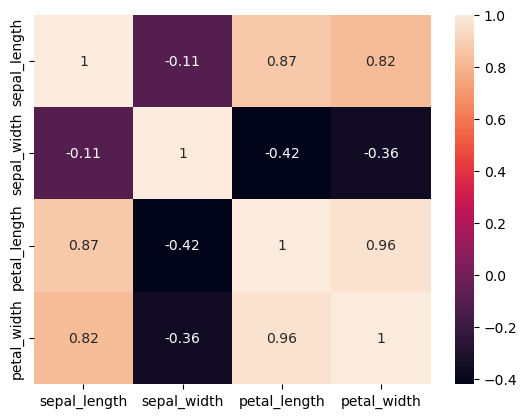

In [26]:
# let's see the correlation between the variables by plot correlation heatmap

sns.heatmap(iris.corr(method='pearson'),annot = True);

plt.show()

## Question 4
There are two flowers with the species identified as 'Iris-setosa' which are identical to each other; what are their indexes?

Hint:
1. Find out the index of the rows that have identical values using the pandas duplicated function, see more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [33]:
# find indexes of duplicated rows
# Find the indexes of duplicated rows
duplicated_rows = iris[iris.duplicated()]

# Print the indexes of duplicated rows
print(duplicated_rows.index)

Int64Index([34, 37, 142], dtype='int64')


# Data Wrangling
In this case, we don't have any missing data, so we don't need to do anything about that. We have a few duplicated rows, but they seem to be legitimate data, so we will keep it in. 

Now that we have an idea of what our data looks like, we need to start preparing it for modelling.

In [34]:
# split up our variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [35]:
# the resulting shapes of X and y should be (150, 4) and (150,) respectively
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Now we need to split up our data into training and test data. Using scikit-learn's `train_test_split` function, using a `test_size` of 0.2 (i.e. 20% of data in test set), and **ensure that the random state is set to our seed from above**.

Documentation for `train_test_split()` can be found here: https://scikit-learn.org/1.1/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
# do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)

Now that we split the data, let us check the number of records in the train and test data

## Question 5
There are __ rows in the train data and __ rows in the test data

Hint:
1. Find out the number of rows and columns in the train and test data using the pandas shape function, see more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [57]:
# finding out the shape of the 'X_train' array will be able to check the number of records in the train data
X_train.shape

(120, 4)

In [58]:
# finding out the shape of the 'y_test' array will be able to check the number of records in the test data
y_test.shape

(30,)

# Modelling
Now we can train our model! Instantiate a KNeighborsClassifier model in scikit-learn with a starting 'k' value of '6' (this can be any other number). Then fit the training data on it.

Documentation for `KNeighborsClassifier()` can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [59]:
# instantiate kNN classifier model with the 'k' value 
knn = KNeighborsClassifier(n_neighbors=6)
# fit the training data (X_train, y_train) to it
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [60]:
# obtain predictions of the model using the test data set 'X_test'
y_pred = knn.predict(X_test)

# Evaluation 
Now we need to evaluate how our model did. Let's start by gathering some evaluation metrics on how the model predicted against the test data.

With a classification report, you will be able to observe the precision, recall, f1-score and support of all the 3  target classes as well as the accuracy of the model.

## Question 6
What is the precision rate of the model for the classification of 'Iris-versicolor'?

Hint:
1. Find out the precision rate using the sklearn classification_report function, see more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [61]:
# print a classification report of the predicted data 'y_pred' against the test data 'y_test'
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.71      0.83      0.77         6
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.87      0.88      0.88        30
   weighted avg       0.91      0.90      0.90        30



With a confusion matrix, you will be able to see in detail how many of each flower was correctly or incorrectly classified by the model

## Question 7
How many flowers in total were incorrectly classified by the model?

Hint:
1. Find out the total number using the sklearn confusion_matrix function, see more about it here:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [62]:
# print a confusion matrix of the predicted data 'y_pred' against the test data 'y_test'
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]


## Question 8
What is the predicted species of the flower at the first row in the test dataset?

Hint:
1. Reshape the first row of the test dataset using the pandas reshape function, see more about it here: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.reshape.html

In [64]:
# reshape the first row of the test dataset into a 2D array
flower = X_test[0].reshape(1, -1)
# get predicted species for the flower using previous 'predict()' method with trained 'knn' model 
species = knn.predict(flower)

In [66]:
# display the predicted flower species
print(f"predicted species of flower: {species}")

predicted species of flower: ['Iris-virginica']


# Optional Discussion
While our model has learned some of the relationships from the data, it still can be improved. One way we could optimise the model is to see what would be the best 'k' value.

To do this, let us look at reducing the misclassification rate of our model. We can do this through 'cross-validation' by comparing the misclassification rate of the model when trained with different 'k' values.

In [67]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list to store scores
cv_scores = []

# for loop to train and store the various accuracy scores for different 'k' values
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

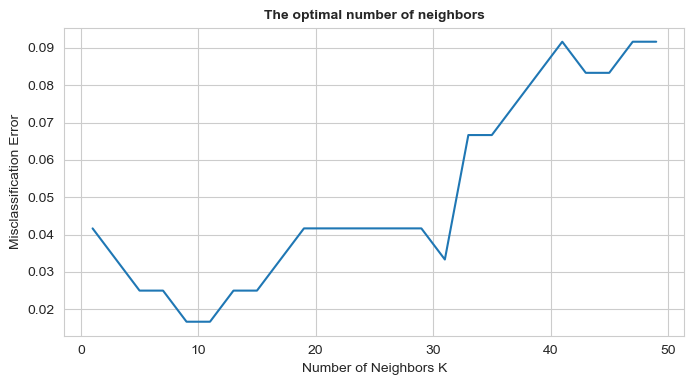

In [68]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(8,4))
plt.title('The optimal number of neighbors', fontsize=10, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=10)
plt.ylabel('Misclassification Error', fontsize=10)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [69]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


Now that we have found out the optimal number for 'k', retraining the model with this 'k' model should give us a lower misclassification rate.

In addition to this, we could look into scaling our variables for a normal distribution as well as optimising other parameters such as distance metrics.

Implementing any of the further potential improvements to the model are left as an optional exercise to the reader ;)

# Prepare your Submission
Congratulations, you made it to the end of this lesson! Be sure to complete the remaining few quiz questions, and prepare your submission:
1. Replace the value of the `NAME` variable with your StackUp name and run the cells below.
2. Restart your notebook, then run it from start to end.
3. Take a screenshot of the output from the last cell in this notebook. Make sure your screenshot shows your taskbar/dock (i.e. take a screenshot of the whole screen, not just the window).

Remember to train your model with the default 'k' value before running the cell below and taking a screenshot

In [70]:
# replace this with your StackUp name
NAME = "riyosanto"

Name                : riyosanto
predicted species of flower: ['Iris-virginica']


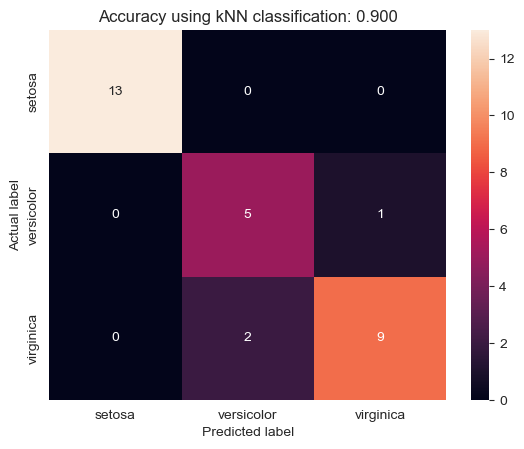

In [71]:
# run this cell, then take a screenshot of the result
print(f"{'Name':<20}: {NAME}")

# get predicted first flower in test data
print(f"predicted species of flower: {species}")

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using kNN classification: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()